In [107]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [108]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier


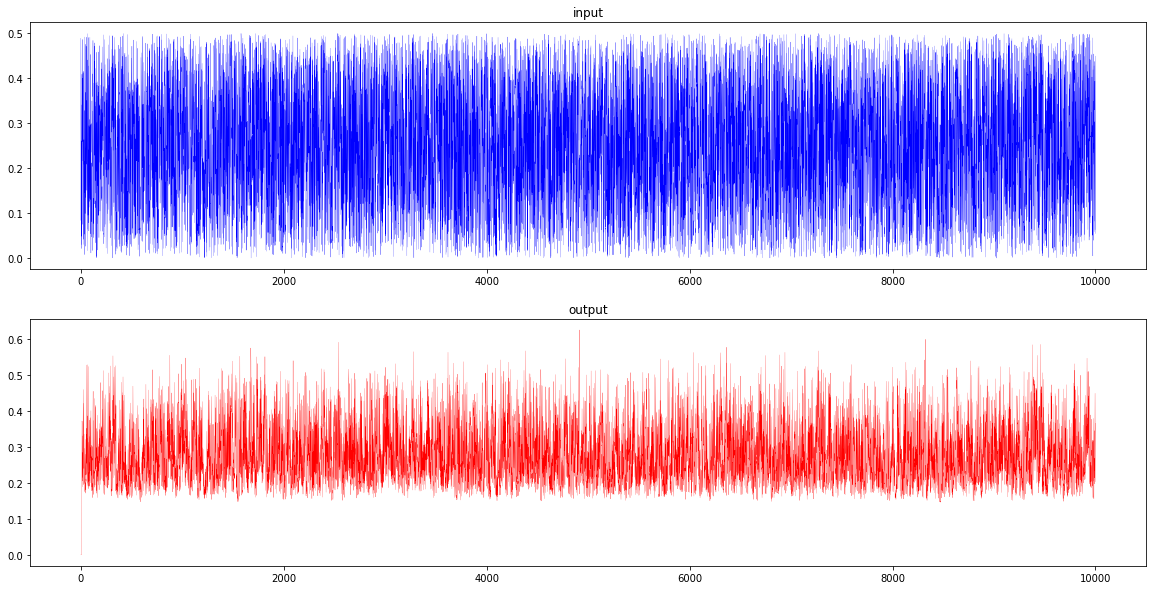

In [109]:
x, y = np.loadtxt("data.txt", delimiter=",")
t=np.arange(start=0,stop=len(x), step=1)

plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.title('input')
plt.plot(t,x, color = 'b', linewidth= 0.2)
plt.subplot(2,1,2)
plt.title('output')
plt.plot(t,y, color = 'r', linewidth = 0.2)

x_train = x[:4000]
x_valid = x[4000:5000]
x_test = x[5000:]

y_train = x[:4000]
y_valid = x[4000:5000]
y_test = x[5000:]

## RNN

In [110]:
def create_model(hidden_units,dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0], return_sequences=True)) #stateful = True
    model.add(Dense(units=dense_units, activation=activation[1]))
    learning_rate = 0.01
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [111]:
model = KerasClassifier(
    model=create_model,
    loss="mean_squared_error",
    verbose=False,
    learning_rate = 0.02,
    epochs = 150,
    batch_size = 1
)

print(model.get_params().keys())

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'learning_rate', 'class_weight'])


In [117]:
X = np.reshape(x, (1,len(x),1))
Y = np.reshape(y, (1,len(y),1))

X_train = np.reshape(x_train, (1,len(x_train),1))
Y_train = np.reshape(y_train, (1,len(y_train),1))

X_valid = np.reshape(x_valid, (1,len(x_valid),1))
Y_valid = np.reshape(y_valid, (1,len(y_valid),1))


# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [50, 100, 150]
param_grid = dict(optimizer=optimizers, epochs=epochs, model__init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
#grid_result = grid.fit(X_train, Y_train)


In [116]:

grid_result = grid.fit(X_train,  Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=1.

In [ ]:
model = create_model(20, 1 , (len(x_train),1), activation=['tanh', 'tanh'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 4000, 20)          440       
                                                                 
 dense (Dense)               (None, 4000, 1)           21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


2023-04-27 17:01:06.390862: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [ ]:
wx = model.get_weights()[0]
wh = model.get_weights()[1]
bh = model.get_weights()[2]
wy = model.get_weights()[3]
by = model.get_weights()[4]
 
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)




wx =  [[-0.09110323 -0.41336453 -0.11432114  0.46447182  0.04853976 -0.23447818
  -0.4499777   0.2213707  -0.05133834  0.2317257   0.03128564  0.17494386
  -0.24511713 -0.10488063 -0.11270916  0.3174247  -0.28974843 -0.5220805
   0.49482042  0.38068366]]  wh =  [[-2.10068822e-01  3.63019854e-01 -3.77190143e-01  1.39695242e-01
  -7.75619373e-02  1.41592920e-01 -6.85563311e-02  2.46849209e-02
  -5.48435636e-02  7.08025396e-02  4.93323028e-01 -3.42502832e-01
   2.01642197e-02  6.44277874e-03 -1.22562245e-01 -2.47533530e-01
   3.00749242e-01  4.35047224e-02  6.08785264e-02 -2.99063176e-01]
 [ 2.30119731e-02  1.52484849e-01  2.90452149e-02  1.11940749e-01
   2.66553968e-01 -2.20917031e-01  5.96388206e-02  2.49138653e-01
  -4.92172778e-01  3.44814241e-01 -1.54429376e-01  1.65622786e-01
  -5.42238019e-02 -1.33897781e-01  1.78211898e-01 -9.75628570e-03
   2.04745367e-01 -3.05174083e-01  4.13120270e-01 -8.06735456e-02]
 [-4.61163998e-01 -9.39145982e-02 -2.93532491e-01  1.80155456e-01
  -5.63882

In [ ]:
print(x_train.shape)

(4000,)


In [ ]:

X_train = np.reshape(x_train, (1,len(x_train),1))
Y_train = np.reshape(y_train, (1,len(y_train),1))

X_valid = np.reshape(x_valid, (1,len(x_valid),1))
Y_valid = np.reshape(y_valid, (1,len(y_valid),1))

print(X_train.shape)
print(Y_train.shape)

print(X_valid.shape)
print(Y_valid.shape)


model.evaluate(X_train, Y_train)
#history = model.fit(X_train, Y_train, epochs = 100, validation_data = (X_valid, Y_valid))
history = model.fit(X_train, Y_train, epochs = 200).history




(1, 4000, 1)
(1, 4000, 1)
(1, 1000, 1)
(1, 1000, 1)
1/1 [==============================] - 0s 333ms/step - loss: 0.1180
Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 0.1180
Epoch 2/200
1/1 [==============================] - 0s 416ms/step - loss: 0.0868
Epoch 3/200
1/1 [==============================] - 0s 400ms/step - loss: 0.0601
Epoch 4/200
1/1 [==============================] - 0s 456ms/step - loss: 0.0429
Epoch 5/200
1/1 [==============================] - 0s 415ms/step - loss: 0.0343
Epoch 6/200
1/1 [==============================] - 0s 384ms/step - loss: 0.0310
Epoch 7/200
1/1 [==============================] - 0s 370ms/step - loss: 0.0308
Epoch 8/200
1/1 [==============================] - 0s 372ms/step - loss: 0.0319
Epoch 9/200
1/1 [==============================] - 0s 424ms/step - loss: 0.0330
Epoch 10/200
1/1 [==============================] - 0s 374ms/step - loss: 0.0335
Epoch 11/200
1/1 [==============================] - 0s 373ms/step - loss: 0.0331
E

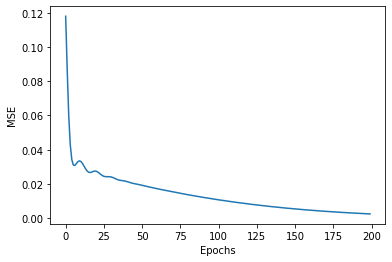

In [ ]:
plt.plot(history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

1/1 [==============================] - 0s 171ms/step - loss: 0.0028


0.0027541229501366615

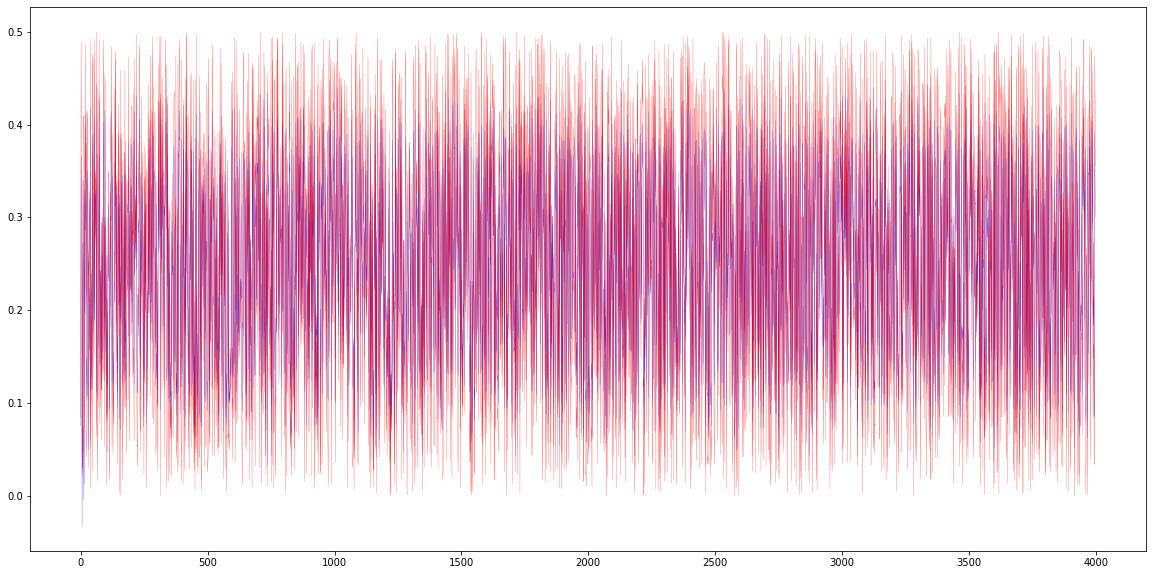

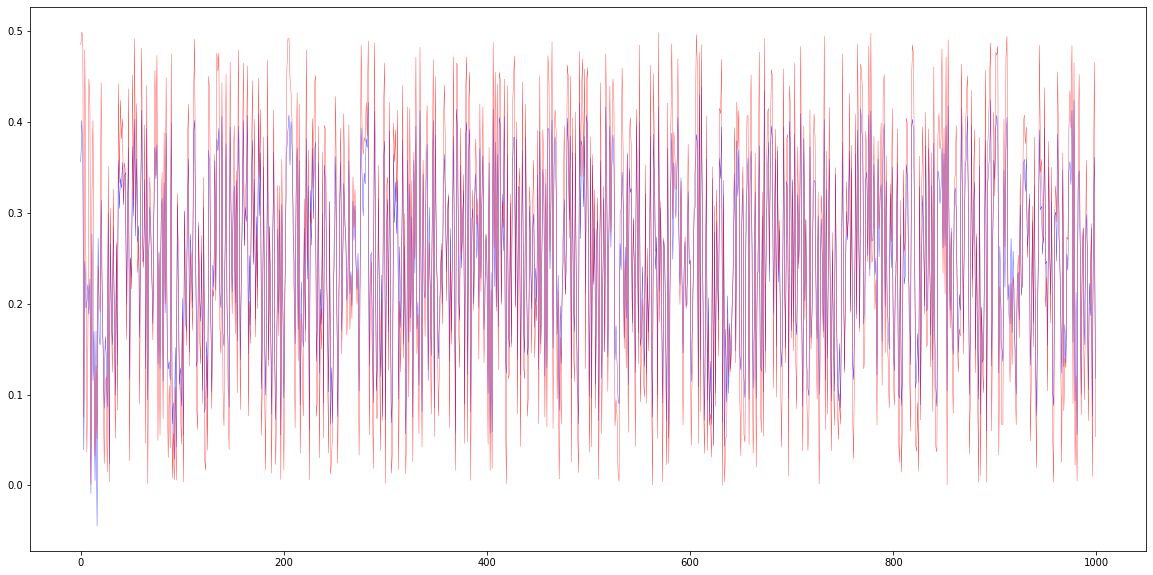

In [ ]:
y = model.predict(X_train)
t=np.arange(start=0,stop=len(X_train[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.2)
plt.plot(t,Y_train.ravel(), color = 'r', linewidth= 0.2)
model.evaluate(X_train, Y_train)


y = model.predict(X_valid)
t=np.arange(start=0,stop=len(X_valid[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.3)
plt.plot(t,Y_valid.ravel(), color = 'r', linewidth= 0.3)
model.evaluate(X_valid, Y_valid)
